# 빅데이터 분석 기사 실기 - 모의고사

---

## 모의고사 1회

### 제1유형

### Data: US economic time series

Format - A data frame with 574 rows and 6 variables:

- date - Month of data collection
- pce - personal consumption expenditures, in billions of dollars
- pop - total population, in thousands
- psavert - personal savings rate
- uempmed - median duration of unemployment, in weeks
- unemploy - number of unemployed in thousands

#### 제1유형: 1
psavert(개인 저축율)의 월별 평균이 가장 높은 값을 구하시오. (반올림하여 소수 세째 자리 까지 출력)

#### 제1유형: 2
상반기(1월 ~ 6월)와 하반기(7월 ~ 12월)의 pce(개인 소비 지출) 합계의 차이를 구하시오. (반올림하여 정수로 출력)

#### 제1유형: 3
일인당 연 평균 pce(개인 소비 지출)가 가장 큰 연도를 구하시오.
- pop(인구 단위: 천명)
- 인구는 연 평균값으로 계산

---

#### 제1유형: 1
psavert(개인 저축율)의 월별 평균이 가장 높은 값을 구하시오. (반올림하여 소수 세째 자리 까지 출력)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./data/모의고사1회_1유형.csv')
df

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.000,12.6,4.5,2944
1,1967-08-01,509.8,198911.000,12.6,4.7,2945
2,1967-09-01,515.6,199113.000,11.9,4.6,2958
3,1967-10-01,512.2,199311.000,12.9,4.9,3143
4,1967-11-01,517.4,199498.000,12.8,4.7,3066
...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504


In [3]:
# 날짜 데이터 생성
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df

,date,pce,pop,psavert,uempmed,unemploy,year,month,day
0,1967-07-01,506.7,198712.000,12.6,4.5,2944,1967,7,1
1,1967-08-01,509.8,198911.000,12.6,4.7,2945,1967,8,1
2,1967-09-01,515.6,199113.000,11.9,4.6,2958,1967,9,1
3,1967-10-01,512.2,199311.000,12.9,4.9,3143,1967,10,1
4,1967-11-01,517.4,199498.000,12.8,4.7,3066,1967,11,1
...,...,...,...,...,...,...,...,...,...
569,2014-12-01,12062.0,319746.157,7.6,12.9,8717,2014,12,1
570,2015-01-01,12046.0,319928.646,7.7,13.2,8903,2015,1,1
571,2015-02-01,12082.4,320074.511,7.9,12.9,8610,2015,2,1
572,2015-03-01,12158.3,320230.786,7.4,12.0,8504,2015,3,1


In [4]:
# 월별 개인저축율 평균값계산
gp_mean = df.groupby('month')['psavert'].mean()
gp_mean

month
1     8.585417
2     8.537500
3     8.518750
4     8.497917
5     8.797872
6     8.589362
7     8.606250
8     8.481250
9     8.402083
10    8.485417
11    8.568750
12    8.741667
Name: psavert, dtype: float64

In [5]:
# 최대값 계산
print(round(gp_mean.max(), 3))

8.798


#### 제1유형: 2
상반기(1월 ~ 6월)와 하반기(7월 ~ 12월)의 pce(개인 소비 지출) 합계의 차이를 구하시오. (반올림하여 정수로 출력)

In [6]:
sum1 = df.loc[(df['month'] >= 1)&(df['month'] <= 6), 'pce'].sum()

In [7]:
sum2 = df.loc[(df['month'] >= 7)&(df['month'] <= 12), 'pce'].sum()

In [8]:
print(round(sum1 - sum2))

9740


#### 제1유형: 3
일인당 연 평균 pce(개인 소비 지출)가 가장 큰 연도를 구하시오.
- pop(인구 단위: 천명)
- 인구는 연 평균값으로 계산

In [9]:
gp_year = df.groupby('year')[['pop', 'pce']].mean()
gp_year.head()

,pop,pce
year,,
1967,199200.333333,514.466667
1968,200663.750000,556.841667
1969,202648.666667,603.650000
1970,204982.333333,646.725000
1971,207589.333333,699.925000


In [10]:
gp_year['pce_pop'] = gp_year['pce'] / (gp_year['pop'] * 1000)
gp_year.head()

,pop,pce,pce_pop
year,,,
1967,199200.333333,514.466667,0.000003
1968,200663.750000,556.841667,0.000003
1969,202648.666667,603.650000,0.000003
1970,204982.333333,646.725000,0.000003
1971,207589.333333,699.925000,0.000003


In [11]:
print(gp_year['pce_pop'].idxmax())

2015


In [12]:
# 정렬
gp_year.sort_values(by='pce_pop', ascending=False).head()

,pop,pce,pce_pop
year,,,
2015,320159.059500,12120.125,0.000038
2014,318619.452833,11824.025,0.000037
2013,316329.299167,11317.200,0.000036
2012,314163.103750,11006.825,0.000035
2011,311940.749083,10641.125,0.000034


### 제2유형

아래는 물고기의 길이, 너비, 무게 별로 나누어 놓은 1,500개의 데이터이다.
- tuna, salmon, mackerel: 각 500개 데이터
길이, 너비, 무게를 이용하여 물고기의 종류를 예측하는 모델을 생성하시오.

In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.read_csv('./data/모의고사1회_2유형.csv')
df

,Type,Length,Depth,Kg
0,tuna,55.46,13.240930,8.631268
1,tuna,72.07,17.671346,19.288996
2,tuna,62.84,15.635367,13.140561
3,tuna,72.79,18.440841,19.669098
4,tuna,76.63,19.137488,23.021797
...,...,...,...,...
1495,mackerel,41.06,8.252645,1.330602
1496,mackerel,41.77,8.590338,1.476314
1497,mackerel,35.25,7.131067,0.851601
1498,mackerel,36.65,7.519112,1.243252


In [15]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Type    1500 non-null   object 
 1   Length  1500 non-null   float64
 2   Depth   1500 non-null   float64
 3   Kg      1500 non-null   float64
dtypes: float64(3), object(1)
memory usage: 47.0+ KB


In [16]:
# 데이터 기초통계 확인
df.describe()

,Length,Depth,Kg
count,1500.000000,1500.000000,1500.000000
mean,56.369547,13.291733,8.484139
std,14.157102,4.120643,7.713999
min,21.080000,4.188276,0.191172
25%,43.480000,8.904842,1.789154
50%,58.850000,14.515397,5.834710
75%,67.502500,16.603528,14.431151
max,88.940000,21.783584,35.958945


In [17]:
# 데이터 결측치 확인
df.isnull().sum()

Type      0
Length    0
Depth     0
Kg        0
dtype: int64

In [18]:
# 데이터의 타겟 값 분포 확인
df['Type'].value_counts()

tuna        500
salmon      500
mackerel    500
Name: Type, dtype: int64

In [19]:
# 컬럼 추가( TypeNum) - 참치: 0, 연어: 1, 고등어:2
df['TypeNum'] = df['Type'].replace({'tuna':0, 'salmon':1, 'mackerel':2})
df

,Type,Length,Depth,Kg,TypeNum
0,tuna,55.46,13.240930,8.631268,0
1,tuna,72.07,17.671346,19.288996,0
2,tuna,62.84,15.635367,13.140561,0
3,tuna,72.79,18.440841,19.669098,0
4,tuna,76.63,19.137488,23.021797,0
...,...,...,...,...,...
1495,mackerel,41.06,8.252645,1.330602,2
1496,mackerel,41.77,8.590338,1.476314,2
1497,mackerel,35.25,7.131067,0.851601,2
1498,mackerel,36.65,7.519112,1.243252,2


In [20]:
# 길이의 제곱, 길이와 무게 비율 컬럼 생성
df['L2'] = df['Length'] * df['Length']
df['LKgRatio'] = df['Kg'] / df['Length']
df

,Type,Length,Depth,Kg,TypeNum,L2,LKgRatio
0,tuna,55.46,13.240930,8.631268,0,3075.8116,0.155631
1,tuna,72.07,17.671346,19.288996,0,5194.0849,0.267643
2,tuna,62.84,15.635367,13.140561,0,3948.8656,0.209111
3,tuna,72.79,18.440841,19.669098,0,5298.3841,0.270217
4,tuna,76.63,19.137488,23.021797,0,5872.1569,0.300428
...,...,...,...,...,...,...,...
1495,mackerel,41.06,8.252645,1.330602,2,1685.9236,0.032406
1496,mackerel,41.77,8.590338,1.476314,2,1744.7329,0.035344
1497,mackerel,35.25,7.131067,0.851601,2,1242.5625,0.024159
1498,mackerel,36.65,7.519112,1.243252,2,1343.2225,0.033922


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

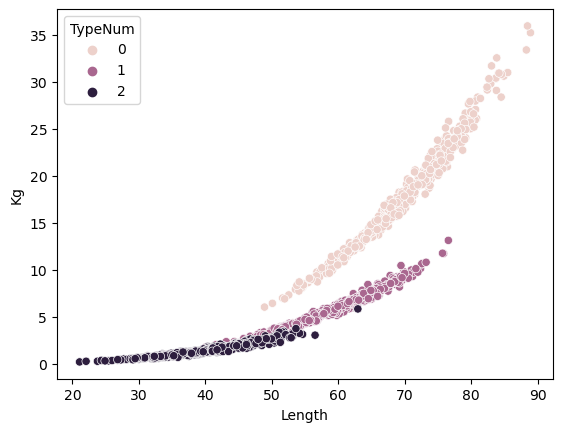

In [22]:
sns.scatterplot(data=df, x='Length', y='Kg', hue='TypeNum')
plt.show()

In [23]:
# [1] Data Split
from sklearn.model_selection import train_test_split

X_col = ['Length', 'Depth', 'Kg', 'L2', 'LKgRatio']

y_col = 'TypeNum'

X_train, X_test, y_train, y_test = train_test_split(df[X_col], df[y_col])

# [2] Classifier
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

#model = XGBClassifier()
#model = RandomForestClassifier(n_estimators=100, max_depth=4)
model = RandomForestClassifier(random_state=123)

# [3] Fit
model.fit(X_train, y_train)

# [4] Predict
pred = model.predict(X_test)

# [5] Evaluation
from sklearn import metrics

# Classification report
print(metrics.classification_report(y_test, pred))

print(round(metrics.f1_score(y_test, pred, average='macro'), 2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       0.99      1.00      1.00       132
           2       1.00      0.99      1.00       121

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375

1.0


### 제3유형

#### 5월과 6월의 평균 기온(Temp)은 차이가 있는가?
- 귀무가설(H0): 5월과 6월의 평균 기온은 같다.
- 대립가설(H1): 5월과 6월의 평균 기온은 같지 않다.
- 유의 수준: 0.05

#### 제3유형: 1
Month가 5월과 6월의 평균 기온을 각각 구하시오. (반올림하여 소수점 둘째자리 까지 출력)

#### 제3유형: 2
5월과 6월의 평균 기온이 같은지 검정하기 위한 검정 통계량과 p-value 값을 구하시오. (반올림하여 소수점 둘째 자리 까지 출력)

#### 제3유형: 3
유의수준이 0.05 일때 5월과 6월의 평균 기온은 통계적으로 같다고 할 수 있는가?

---

In [24]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv('./data/모의고사1회_3유형.csv')
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


#### 제3유형: 1
Month가 5월과 6월의 평균 기온을 각각 구하시오. (반올림하여 소수점 둘째자리 까지 출력)

In [26]:
group5 = df.loc[df['Month'] == 5, 'Temp']
group6 = df.loc[df['Month'] == 6, 'Temp']

In [27]:
mean_5 = group5.mean()
mean_6 = group6.mean()

In [28]:
print(round(mean_5, 2))
print(round(mean_6, 2))

65.55
79.1


#### 제3유형: 2
5월과 6월의 평균 기온이 같은지 검정하기 위한 검정 통계량과 p-value 값을 구하시오. (반올림하여 소수점 둘째 자리 까지 출력)

In [29]:
# 등분산 검정
# 귀무가설: 두 그룹의 분산이 같다.

from scipy import stats

statistic, p_value = stats.levene(group5, group6, center='mean')

print('statistic:', round(statistic,2))
print('p-value:', round(p_value,2))

# 귀무가설 채택

statistic: 0.25
p-value: 0.62


In [30]:
from scipy import stats

alpha = 0.05  # 유의수준

t_statistic, p_value = stats.ttest_ind(group5, group6, equal_var=True,  alternative='two-sided')
#t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False, alternative='two-sided')

print('t-statistic:', round(t_statistic,2))
print('p-value:', round(p_value,2))

t-statistic: -7.86
p-value: 0.0


#### 제3유형: 3
유의수준이 0.05 일때 5월과 6월의 평균 기온은 통계적으로 같다고 할 수 있는가?

- p_value가 0.05 보다 작으므로 귀무가설은 기각된다.  
- 5월와 6월의 평균 기온은 같지 않다.

---

## 모의고사 2회

### 제1유형

#### 제1유형: 1
manufacturer(제조사)가 volkswagen인 행들의 연료비 평균을 구하시오. (반올림하여 소수점 둘째 자리 까지 출력)

- mpg 데이터의 fl 변수는 자동차에 사용하는 연료(fuel)를 의미합니다. 아래는 자동차 연료별 가격을 나타낸 표입니다.

|fl |연료 종류|가격(갤런당 USD)|
|---|---|---|
|c | CNG | 2.35|
|d | diesel |	2.38|
|e | ethanol E85 | 2.11|
|p | premium | 2.76|
|r | regular | 2.22|

#### 제1유형: 2
자동차의 cty(도시 연비)의 평균이 가장 높은 category(자동차 종류)의 hwy(고속도로 연비) 평균을 구하시오. (반올림하여 소수점 둘째 자리 까지 출력)

#### 제1유형: 3
hwy(고속도로 연비)의 평균값과 hwy 결측치를 hwy의 중앙값으로 채운 평균값의 차이를 구하시오. (반올림하여 소수점 둘째 자리 까지 출력)

---

#### 제1유형: 1
manufacturer(제조사)가 volkswagen인 행들의 연료비 평균을 구하시오. (반올림하여 소수점 둘째 자리 까지 출력)

- mpg 데이터의 fl 변수는 자동차에 사용하는 연료(fuel)를 의미합니다. 아래는 자동차 연료별 가격을 나타낸 표입니다.

|fl |연료 종류|가격(갤런당 USD)|
|---|---|---|
|c | CNG | 2.35|
|d | diesel |	2.38|
|e | ethanol E85 | 2.11|
|p | premium | 2.76|
|r | regular | 2.22|

In [31]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv('./data/모의고사2회_1유형.csv')
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [33]:
fuel = pd.DataFrame({'fl' : ['c', 'd', 'e', 'p', 'r'],
                     'price_fl' : [2.35, 2.38, 2.11, 2.76, 2.22]})
fuel

,fl,price_fl
0,c,2.35
1,d,2.38
2,e,2.11
3,p,2.76
4,r,2.22


In [34]:
df['fl'].value_counts().sort_index()

c      1
d      5
e      8
p     52
r    168
Name: fl, dtype: int64

In [35]:
df = pd.merge(df, fuel, how = 'left', on = 'fl') 
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,price_fl
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.76
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.76
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.76
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.76
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,2.76
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,2.76
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,2.76
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,2.76


In [36]:
result = df.loc[df['manufacturer'] == 'volkswagen', 'price_fl'].mean()

In [37]:
print(round(result,2))

2.46


#### 제1유형: 2
자동차의 cty(도시 연비)의 평균이 가장 높은 category(자동차 종류)의 hwy(고속도로 연비) 평균을 구하시오. (반올림하여 소수점 둘째 자리 까지 출력)

In [38]:
gp_mean = df.groupby('category')[['cty','hwy']].mean()
gp_mean

,cty,hwy
category,,
2seater,15.400000,24.800000
compact,20.127660,28.297872
midsize,18.756098,27.292683
minivan,15.818182,22.363636
pickup,13.000000,16.878788
subcompact,20.371429,28.142857
suv,13.500000,18.129032


In [39]:
result = gp_mean.loc[gp_mean['cty'].idxmax(), 'hwy']

In [40]:
print(round(result,2))

28.14


In [41]:
# 정렬
gp_mean.sort_values(by='cty', ascending=False)

,cty,hwy
category,,
subcompact,20.371429,28.142857
compact,20.127660,28.297872
midsize,18.756098,27.292683
minivan,15.818182,22.363636
2seater,15.400000,24.800000
suv,13.500000,18.129032
pickup,13.000000,16.878788


#### 제1유형: 3
hwy(고속도로 연비)의 평균값과 hwy 결측치를 hwy의 중앙값으로 채운 평균값의 차이를 구하시오. (반올림하여 소수점 둘째 자리 까지 출력)

In [42]:
df = pd.read_csv('./data/모의고사2회_1유형.csv')

In [43]:
# 결측치 생성
df.loc[[1,3,10,20,30,40,50,60,230,232], 'hwy'] = np.nan
df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29.0,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,NaN,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31.0,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,NaN,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26.0,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28.0,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,NaN,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26.0,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,NaN,p,midsize


In [44]:
mean_1 = df['hwy'].mean()

In [45]:
mean_2 = df['hwy'].fillna(df['hwy'].median()).mean()

In [46]:
print(round(abs(mean_1 - mean_2),2))

0.02


### 제2유형

아래는 날짜별로 자전거 대여 수요에 대한 데이터이다.
- 날짜별로 자전거 대여 수요(count)를 예측하는 모델을 구성하시오.

In [47]:
import numpy as np
import pandas as pd

In [48]:
df = pd.read_csv('./data/모의고사2회_2유형.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [50]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [51]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [52]:
# datetime 타입으로 변경
df['datetime'] = pd.to_datetime(df['datetime'])

In [53]:
# datetime 타입에서 년, 월, 일, 시간 추출
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [54]:
# 컬럼 삭제
df.drop(['datetime','casual','registered'], axis=1,inplace=True)

In [55]:
df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [56]:
# Min-Max 스케일링
from sklearn.preprocessing import MinMaxScaler

col_num = ['temp','atemp','humidity','windspeed']

scaler = MinMaxScaler()
df[col_num] = scaler.fit_transform(df[col_num])

In [57]:
# [1] Data Split
from sklearn.model_selection import train_test_split

X_col = ['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','year','month','day','hour']

y_col = 'count'

X_train, X_test, y_train, y_test = train_test_split(df[X_col], df[y_col], random_state=123)

# [2] Regressor
#from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#model = RandomForestRegressor()
model = XGBRegressor()

# [3] Fit
model.fit(X_train, y_train)

# [4] Predict
pred = model.predict(X_test)

# [5] Evaluation
from sklearn import metrics

# R squared
print(round(metrics.r2_score(y_test, pred),2))

# RMSE(Root Mean Squared Error)
print(round(metrics.mean_squared_error(y_test, pred)**0.5),2)

0.95
42 2


### 제3유형

#### 성별과 지지정당 사이에는 서로 관계가 있는가?
- 귀무가설(H0): 성별과 지지정당 사이에는 서로 관계가 없다.(독립이다)
- 대립가설(H1): 성별과 지지정당 사이에는 서로 관계가 있다.
- 유의 수준: 0.05

#### 제3유형: 1
성별과 지지정당의 분할표를 작성하시오.

#### 제3유형: 2
가설검정을 위한 검정통계량과 p-value 값을 소수점 둘째자리까지 반올림하여 구하시오.

#### 제3유형: 3
성별과 지지정당 사이에는 관계가 있는가? (유의수준 0.05)

---

#### 제3유형: 1
성별과 지지정당의 분할표를 작성하시오.

In [58]:
import numpy as pd
import pandas as pd

In [59]:
df = pd.read_csv('./data/모의고사2회_3유형.csv')
df.head()

,성별,지지정당
0,남자,A정당
1,남자,A정당
2,남자,A정당
3,남자,B정당
4,남자,A정당


In [60]:
obs  = pd.crosstab(index=df['성별'], columns=df['지지정당'])
obs

지지정당,A정당,B정당,C정당
성별,,,
남자,9,5,1
여자,2,8,5


#### 제3유형: 2
가설검정을 위한 검정통계량과 p-value 값을 소수점 둘째자리까지 반올림하여 구하시오.

In [61]:
from scipy import stats

# statistic(통계량), p_value, dof(자유도), expected_freq(기대빈도)
statistic, p_value, dof, expected = stats.chi2_contingency(obs)

print(round(statistic,2))
print(round(p_value,2))

7.81
0.02


#### 제3유형: 3
성별과 지지정당 사이에는 관계가 있는가? (유의수준 0.05)

- p_value가 0.05 보다 작으므로 귀무가설은 기각된다.  
- 성별과 지지정당 사이에는 서로 관계가 있다.

---

In [62]:
# End of file